# K-means Model for House classifying system using California housing dataset 

## 1. Import modules 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from utils import cross_val

## 2. Data preparation 
### 2.1 Data Download 

In [2]:
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
print(data_df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

### 2.2 Data inspection 

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- All numerical features 
- Total of 20640 observations 
- Important features like Median Income, Latitude and Longitude have no missing values! 

In [4]:
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
data_df.head().T

,0,1,2,3,4
MedInc,8.325200,8.301400,7.257400,5.643100,3.846200
HouseAge,41.000000,21.000000,52.000000,52.000000,52.000000
AveRooms,6.984127,6.238137,8.288136,5.817352,6.281853
AveBedrms,1.023810,0.971880,1.073446,1.073059,1.081081
Population,322.000000,2401.000000,496.000000,558.000000,565.000000
AveOccup,2.555556,2.109842,2.802260,2.547945,2.181467
Latitude,37.880000,37.860000,37.850000,37.850000,37.850000
Longitude,-122.230000,-122.220000,-122.240000,-122.250000,-122.250000
MedHouseVal,4.526000,3.585000,3.521000,3.413000,3.422000


### 2.3 Filter only required features 

In [6]:
data_df=data_df[['MedInc', 'Latitude', 'Longitude']]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [7]:
data_df.describe()

,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,-119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,-124.350000
25%,2.563400,33.930000,-121.800000
50%,3.534800,34.260000,-118.490000
75%,4.743250,37.710000,-118.010000
max,15.000100,41.950000,-114.310000


In [8]:
data_df.head().T

,0,1,2,3,4
MedInc,8.3252,8.3014,7.2574,5.6431,3.8462
Latitude,37.8800,37.8600,37.8500,37.8500,37.8500
Longitude,-122.2300,-122.2200,-122.2400,-122.2500,-122.2500


### 2.4 Test-train split 

In [9]:
training_data, testing_data=train_test_split(data_df, test_size=0.2, random_state=42)
training_data.info()
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     16512 non-null  float64
 1   Latitude   16512 non-null  float64
 2   Longitude  16512 non-null  float64
dtypes: float64(3)
memory usage: 516.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 20046 to 3665
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     4128 non-null   float64
 1   Latitude   4128 non-null   float64
 2   Longitude  4128 non-null   float64
dtypes: float64(3)
memory usage: 129.0 KB


## 3. EDA 
### 3.1 Handle any missing and extreme values 

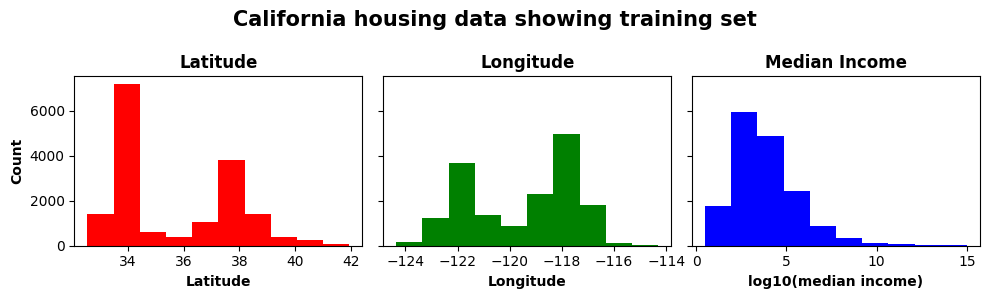

In [16]:
fig, axs=plt.subplots(1, 3, figsize=(10, 3), sharey=True)

fig.suptitle('California housing data showing training set', fontsize=15, fontweight='bold')

axs[0].set_ylabel('Count', fontweight='bold')
axs[0].set_title('Latitude', fontweight='bold')
axs[0].hist(training_data['Latitude'], color='red')
axs[0].set_xlabel('Latitude', fontweight='bold')

axs[1].hist(training_data['Longitude'], color='green')
axs[1].set_title('Longitude', fontweight='bold')
axs[1].set_xlabel('Longitude', fontweight='bold')

axs[2].hist(training_data['MedInc'], color='blue')
axs[2].set_title('Median Income', fontweight='bold')
axs[2].set_xlabel('log10(median income)', fontweight='bold')

plt.tight_layout()
plt.show()

### 3.2 Feature scaling 

In [17]:
scaler=MinMaxScaler()
scaler.fit(training_data)

scaled_training_data=scaler.transform(training_data)
scaled_training_data=pd.DataFrame(scaled_training_data, columns=training_data.columns)

scaled_testing_data=scaler.transform(testing_data)
scaled_testing_data=pd.DataFrame(scaled_testing_data, columns=testing_data.columns)

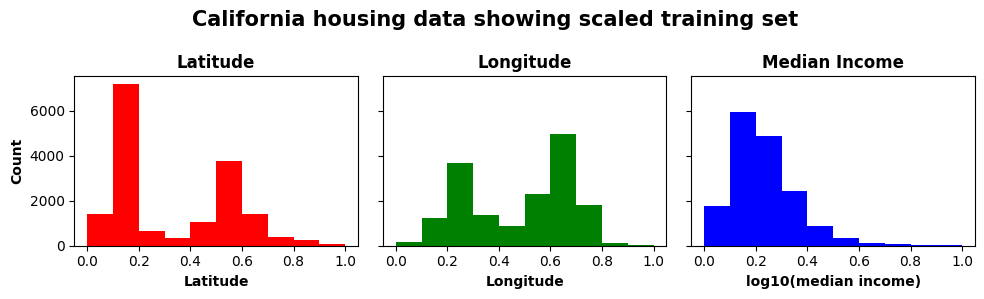

In [18]:
fig, axs=plt.subplots(1, 3, figsize=(10, 3), sharey=True)

fig.suptitle('California housing data showing scaled training set', fontsize=15, fontweight='bold')

axs[0].set_ylabel('Count', fontweight='bold')
axs[0].set_title('Latitude', fontweight='bold')
axs[0].hist(scaled_training_data['Latitude'], color='red')
axs[0].set_xlabel('Latitude', fontweight='bold')

axs[1].hist(scaled_training_data['Longitude'], color='green')
axs[1].set_title('Longitude', fontweight='bold')
axs[1].set_xlabel('Longitude', fontweight='bold')

axs[2].hist(scaled_training_data['MedInc'], color='blue')
axs[2].set_title('Median Income', fontweight='bold')
axs[2].set_xlabel('log10(median income)', fontweight='bold')

plt.tight_layout()
plt.show()